In [8]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf
import numpy as np
import matplotlib.pyplot as plt
import glob
import tqdm
from scipy.interpolate import UnivariateSpline

def fit_continuum(x, y, ivars, order=6, nsigma=[0.3,3.0], maxniter=50):
    """Fit the continuum using sigma clipping
    Args:
        x: The wavelengths
        y: The log-fluxes
        order: The polynomial order to use
        nsigma: The sigma clipping threshold: tuple (low, high)
        maxniter: The maximum number of iterations to do
    Returns:
        The value of the continuum at the wavelengths in x
    """
    A = np.vander(x - np.nanmean(x), order+1)
    m = np.ones(len(x), dtype=bool)
    for i in range(maxniter):
        m[ivars == 0] = 0  # mask out the bad pixels
        w = np.linalg.solve(np.dot(A[m].T, A[m]), np.dot(A[m].T, y[m]))
        mu = np.dot(A, w)
        resid = y - mu
        sigma = np.sqrt(np.nanmedian(resid**2))
        #m_new = np.abs(resid) < nsigma*sigma
        m_new = (resid > -nsigma[0]*sigma) & (resid < nsigma[1]*sigma)
        if m.sum() == m_new.sum():
            m = m_new
            break
        m = m_new
    return mu

In [92]:
files = glob.glob('data/Spectra/SOPHIE/*.fits')

In [91]:
# flux = pf.getdata(files[0])
# m = np.isnan(flux)
# flux = np.log(flux[~m])

In [86]:


# plt.plot(wav, flux)
# plt.plot(wav, model)

In [121]:
wav = np.arange(4000., 6800, 0.05)
m = np.zeros_like(wav, dtype=bool)
for i, file in enumerate(files):
    flux = pf.getdata(file)
    m = m | np.isnan(flux)
wav = np.arange(4000., 6800, 0.05)[~m]

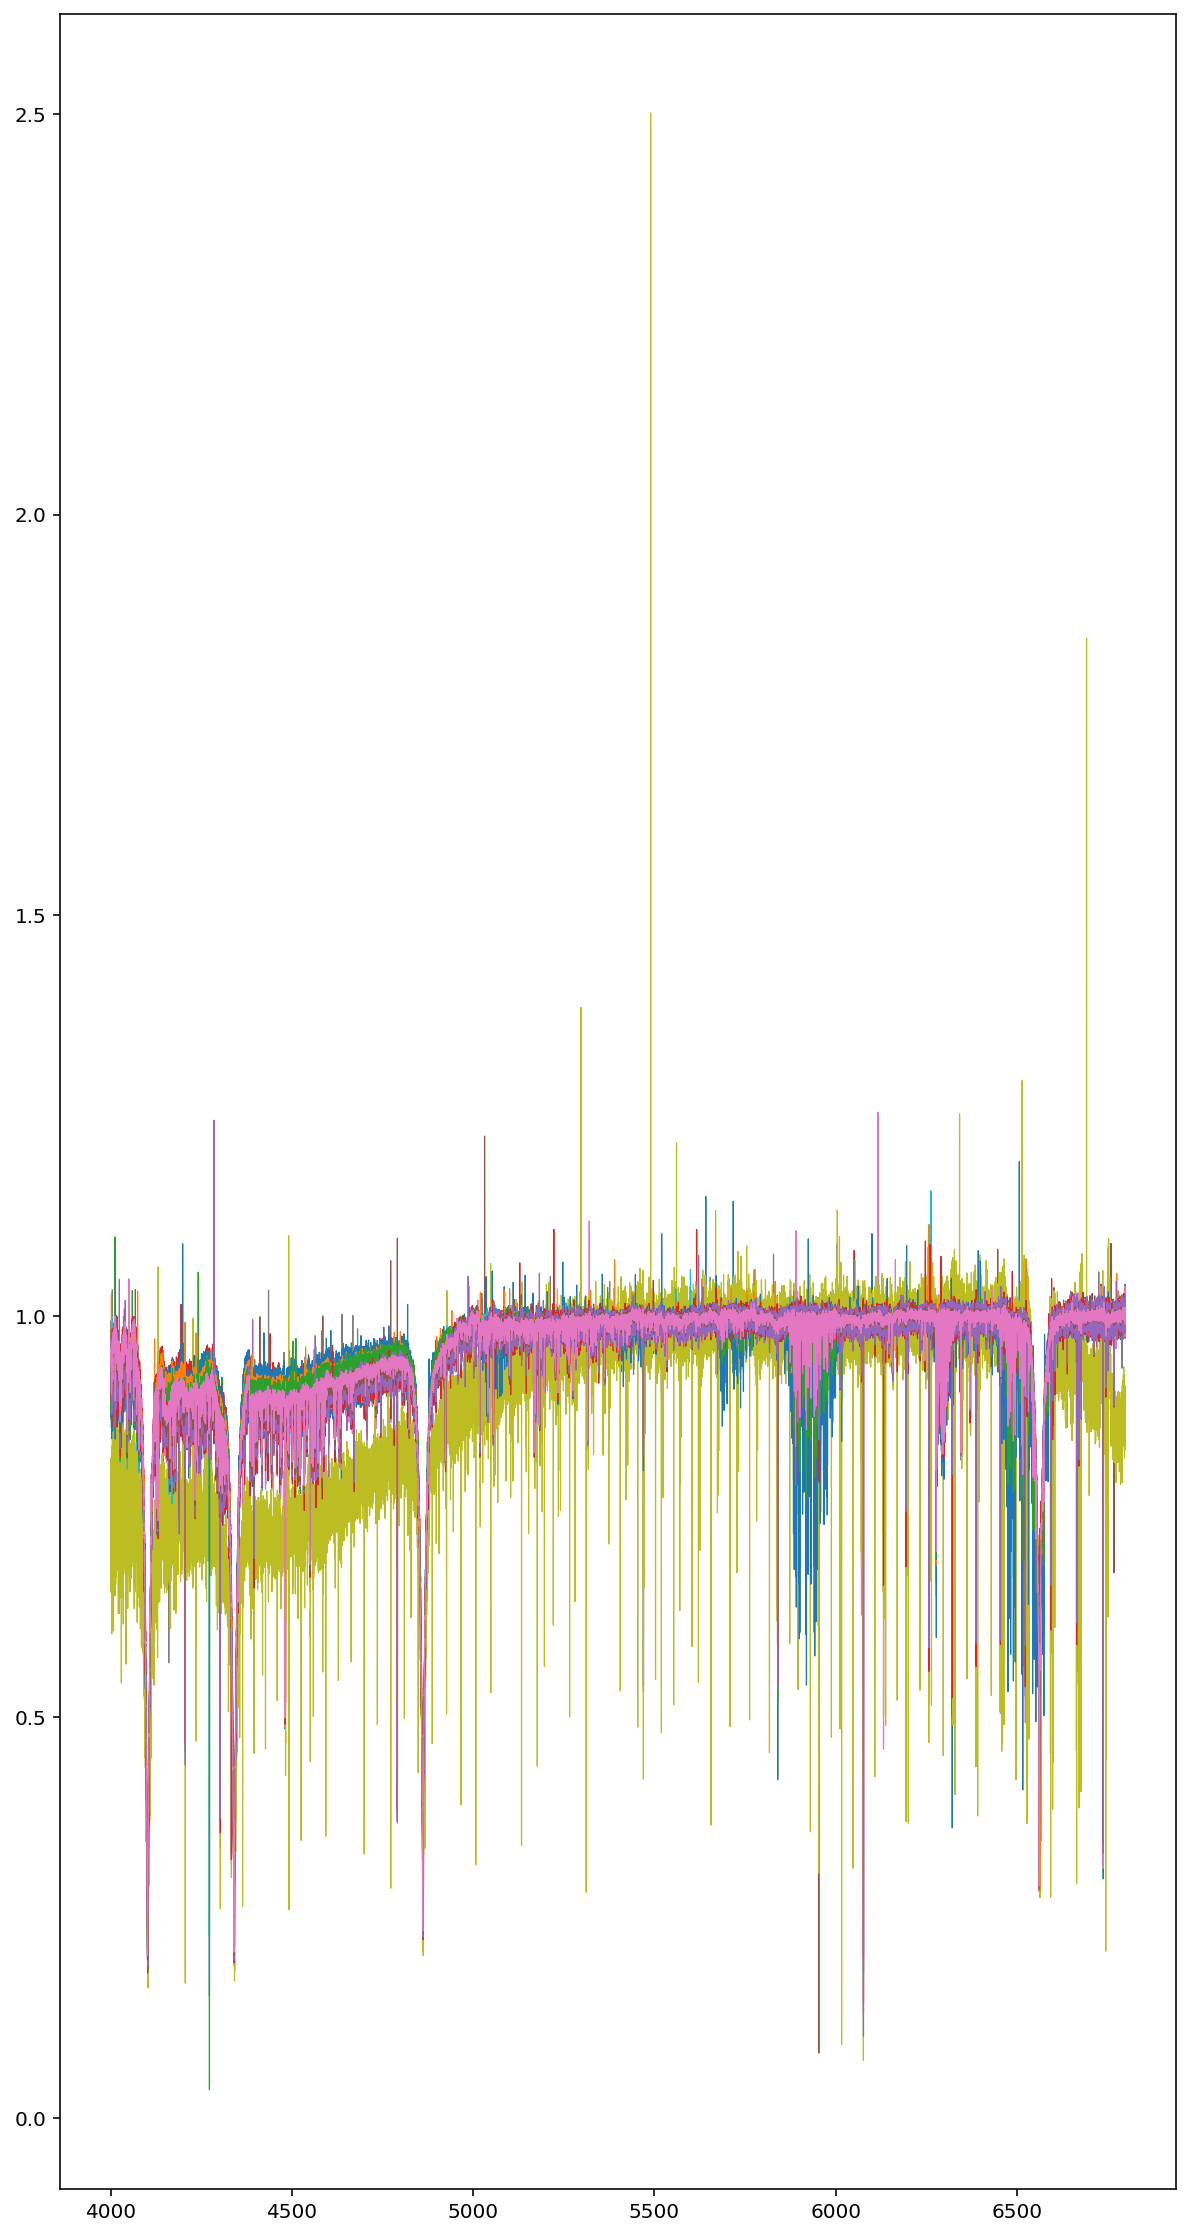

In [128]:
plt.figure(figsize=[10,20])
for i, file in enumerate(files):
    flux = pf.getdata(file)
    flux = (flux[~m])
    
    flux /= fit_continuum(wav, flux, np.ones_like(wav, dtype=bool), order=6)
#     p = np.polyfit(wav, flux, deg=3)
#     model = np.polyval(p, wav)
#     flux /= model
    
    plt.plot(wav, flux, lw=0.6)
#     print(len(wav))

In [ ]:
spl(wav)\

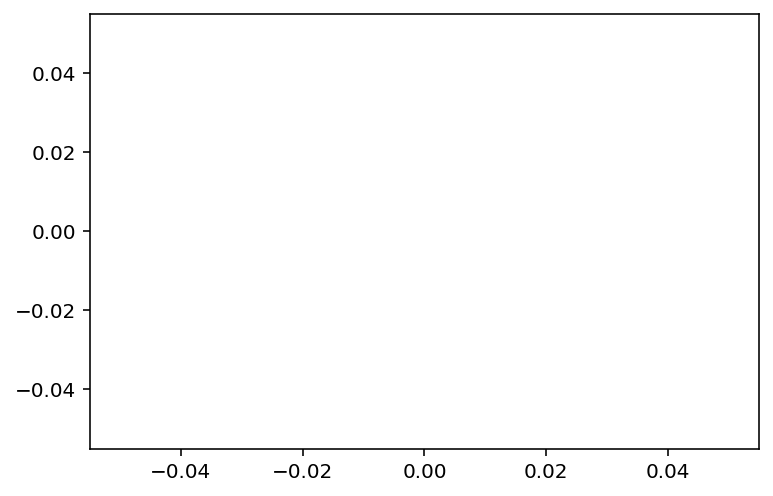

In [30]:
flat = flatten(wav, flux)
plt.plot(wav, flat)

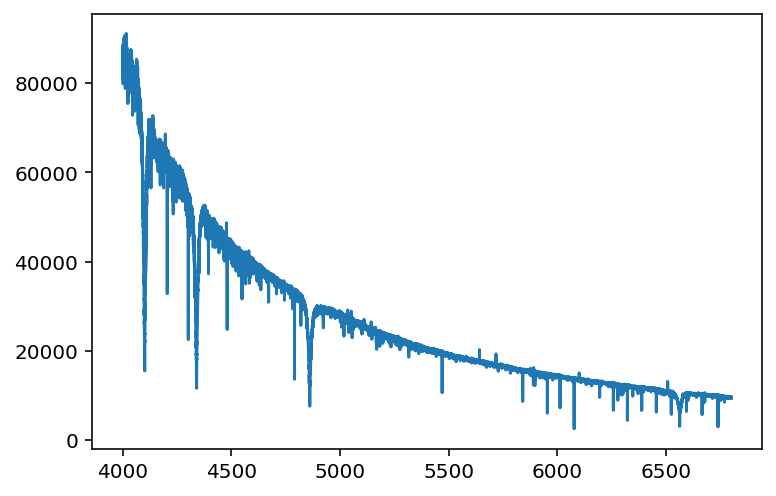

In [13]:
plt.plot(wav, spec_data)